<a href="https://colab.research.google.com/github/nnc1230/nnc1230.github.io/blob/master/HRSA_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Health Resources and Services Administration (HRSA) Cost Prediction**


---
**Dataset:**
The data has 29 attributes:


*   **Minority**: % Rachial and/or Ethnic Minority Patients
*   **Hispanic/Latino**: % Hispanic/Latino Patients
*   **200Poverty**: % Patients at or Below 200% of Federal Poverty Guideline
*   **100Poverty**: % Patients at or Below 100% of Federal Poverty Guideline (included in above)
*   **Uninsured**: % None/Uninsured Patients
*   **Medicaid/CHIP**: % Medicaid/CHIP Patients (Medicaid, Medicaid CHIP, and Other Public Insurance CHIP)
*   **Medicare**: % Medicare Patients
*   **Third-Party**: % Other Third-Party Patients
*   **Homeless**: % Homeless Patients
*   **Veterans**: % Veterans Patients
*   **Medical**: % Patients Receiving Medical Services
*   **Dental**: % Patients Receiving Dental Services
*   **EnablingServices**: % Patients Receiving Enabling Services
*   **Hypertension**: % Hypertensive adults
*   **Diabetes**: % Diabetic adults
*   **Asthma**: % Asthma patients
*   **HIV**: % Symptomatic/Asymptomatic human immunodeficiency virus (HIV) Patients
*   **PrenatalCare**: % Early Entry into Prenatal Care (first visit in first trimester)
*   **LowBirthWeight**: % Low and Very Low Birth Weight
*   **CervicalCancerScreening**: % Eligible patients receiving Cervical Cancer Screening
*   **AdultWeightScreening**: % Adult Medical Patients Age 18 and Older with Body Mass Index (BMI) Screening and Follow-Up
*   **TobaccoScreening**: % Adult Medical Patients Age 18 and Older Screened for Tobacco Use and Received Cessation Counseling
*   **ColorectalCancerScreening**: % Eligible patients Screened for Colorectal Cancer 
*   **DepressionScreening**: % Patients Screened for Clinical Depression and if Positive had a Follow-Up Plan Documented
*   **AsthmaMedications**: % Persistent Asthmatic Patients Treated with Appropriate Pharmacological Intervention
*   **AspirinIVD**: % Patients Age 18 and Older Diagnosed with Ischemic Vascular Disease (IVD): Use of Aspirin or Another Antithrombotic
*   **ControllingHighBP**: % Patients with Hypertension (HTN) Whose Blood Pressure (BP) was Controlled (< 140/90 mmHg)
*   **UncontrolledDiabetes**: % Diabetic Patients with Poorly Controlled Hemoglobin A1c (HbA1c > 9%) or No Test During Year
*   **target**: Annual Cost Per Patient





























**Import Libraries**

In [ ]:
import pandas as pd             # data manipulation library
import io                       # helps with input/output of csv files
import matplotlib.pyplot as plt # a library to plot nice graphs
plt.style.use('ggplot') 
import seaborn as sns           # plot style and color on next line
sns.set(style="white", palette="muted", color_codes=True) 
import numpy as np              # Fast array operations    
import pickle

In [ ]:
# Algorithms and evaluation metrics
from sklearn.preprocessing import LabelEncoder             #Changes categorical text data to numeric
from sklearn.preprocessing import StandardScaler           #Standardize features by removing the mean and scaling to unit variance
from sklearn.model_selection import train_test_split       #Split arrays or matrices into random train and test subsets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression          #Fit a linear model to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score                       #regression score function
from sklearn.metrics import mean_squared_error as MSE            #Mean squared error regression loss (MSE)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor         #A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor             # Import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier

# Set random seed for reproducablity
SEED = 1

**1. Data Preparation and Data Exploration**

In [ ]:
# Read data in the excel file
data = pd.read_excel('health_center_percent_2017&2018.xlsx',na_values = '-')
data.head(10)

,Minority,Hispanic/Latino,200Poverty,100Poverty,Uninsured,Medicaid/CHIP,Medicare,Third-Party,Homeless,Veterans,Medical,Dental,Mental,EnablingServices,Hypertension,Diabetes,Asthma,HIV,PrenatalCare,LowBirthWeight,CervicalCancerScreening,AdultWeightScreening,TobaccoScreening,ColorectalCancerScreening,DepressionScreening,AsthmaMedications,AspirinIVD,ControllingHighBP,UncontrolledDiabetes,target
0,0.7613,0.2048,0.8732,0.6565,0.6518,0.1998,0.0397,0.1087,0.2154,0.0078,0.8279,0.1821,0.0000,0.0198,0.3183,0.1524,0.0313,0.0006,0.5000,0.2000,0.2871,0.5286,0.9000,0.1159,0.3487,0.7451,0.3726,0.4451,0.4326,733.71
1,0.4065,0.0321,0.9347,0.7816,0.4153,0.3696,0.0990,0.1160,0.0779,0.0148,0.9702,0.0000,0.0961,0.1699,0.4097,0.1604,0.0575,0.0002,0.7778,0.0704,0.3904,0.4864,0.2273,0.2199,0.5023,0.9565,0.6742,0.5870,0.3134,633.40
2,0.3687,0.0326,0.9165,0.6627,0.1772,0.3284,0.1765,0.3179,0.0029,0.0121,0.9984,0.1274,0.0228,0.1164,0.3223,0.1551,0.0606,0.0007,0.6212,0.1221,0.5968,0.8720,0.9967,0.5075,0.9766,0.9187,0.9237,0.7122,0.2626,1105.41
3,0.7117,0.2449,0.9407,0.7055,0.4493,0.3447,0.0822,0.1238,0.1240,0.0109,0.8950,0.2267,0.0032,0.0493,0.2451,0.1683,0.0674,0.0011,0.8333,0.1000,0.4385,0.6703,0.8935,0.2391,0.6939,0.7835,0.8523,0.5293,0.3245,568.09
4,0.7014,0.0438,0.9857,0.7993,0.6061,0.2154,0.0745,0.1039,0.0575,0.0034,0.7222,0.2786,0.0014,0.3544,0.4119,0.1953,0.0441,0.0115,0.6278,0.0833,0.2398,0.6662,0.8552,0.0931,0.8418,0.9612,0.7686,0.4932,0.4653,744.55
5,0.6776,0.0744,0.9888,0.9148,0.4455,0.4040,0.0302,0.1203,0.1452,0.0083,1.0000,0.1795,0.0272,0.1242,0.1655,0.0908,0.0250,0.0262,0.6338,0.0447,0.5161,0.8200,0.8210,0.2168,0.4186,0.7722,0.6000,0.4511,0.3949,433.54
6,0.0681,0.0362,0.9904,0.8064,0.3224,0.1812,0.1537,0.3427,0.0007,0.0001,1.0000,0.0573,0.0000,0.0000,0.3498,0.1631,0.0151,0.0001,0.9688,0.0769,0.5520,0.7527,0.9104,0.3266,0.8677,0.9667,0.8542,0.5129,0.2833,432.13
7,0.4881,0.1838,0.9668,0.8660,0.7078,0.1615,0.0467,0.0840,0.0218,0.0095,0.9331,0.3055,0.0392,0.0826,0.2132,0.1072,0.0346,0.0004,1.0000,0.0667,0.4400,0.7400,0.7200,0.2099,0.5985,0.9087,0.8294,0.7108,0.2502,473.36
8,0.6811,0.0814,0.9838,0.8432,0.4879,0.2550,0.1151,0.1420,0.0854,0.0187,0.8205,0.2447,0.0432,0.0562,0.4553,0.1869,0.0492,0.0169,0.2834,0.0575,0.2353,0.7069,0.6515,0.1157,0.4923,0.9094,0.8124,0.4550,0.3715,686.04
9,0.5639,0.1328,0.9283,0.6528,0.2248,0.4045,0.1768,0.1938,0.0471,0.0186,0.8822,0.2709,0.1156,0.0479,0.3384,0.1885,0.0322,0.0113,0.7054,0.1040,0.4506,0.3045,0.7792,0.2660,0.3571,0.8333,0.6472,0.5618,0.2571,1395.37


In [ ]:
data.shape

(1987, 30)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Minority                   1987 non-null   float64
 1   Hispanic/Latino            1987 non-null   float64
 2   200Poverty                 1987 non-null   float64
 3   100Poverty                 1987 non-null   float64
 4   Uninsured                  1987 non-null   float64
 5   Medicaid/CHIP              1987 non-null   float64
 6   Medicare                   1987 non-null   float64
 7   Third-Party                1987 non-null   float64
 8   Homeless                   1987 non-null   float64
 9   Veterans                   1987 non-null   float64
 10  Medical                    1987 non-null   float64
 11  Dental                     1987 non-null   float64
 12  Mental                     1987 non-null   float64
 13  EnablingServices           1987 non-null   float

In [ ]:
data.describe()

,Minority,Hispanic/Latino,200Poverty,100Poverty,Uninsured,Medicaid/CHIP,Medicare,Third-Party,Homeless,Veterans,Medical,Dental,Mental,EnablingServices,Hypertension,Diabetes,Asthma,HIV,PrenatalCare,LowBirthWeight,CervicalCancerScreening,AdultWeightScreening,TobaccoScreening,ColorectalCancerScreening,DepressionScreening,AsthmaMedications,AspirinIVD,ControllingHighBP,UncontrolledDiabetes,target
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,0.581891,0.294081,0.900574,0.654217,0.244671,0.449221,0.106561,0.199547,0.061949,0.017092,0.829998,0.228177,0.087339,0.104240,0.284741,0.153188,0.054912,0.008839,0.763669,0.096586,0.528835,0.659543,0.864932,0.409864,0.674323,0.858461,0.795316,0.628222,0.331221,1047.032315
std,0.308732,0.282399,0.113899,0.182941,0.170049,0.184119,0.068461,0.123460,0.152355,0.019642,0.148843,0.167597,0.100296,0.164037,0.095786,0.054138,0.027179,0.034658,0.155743,0.118071,0.162149,0.212229,0.128424,0.169377,0.215767,0.129835,0.130168,0.097289,0.106268,718.376333
min,0.007200,0.000000,0.081400,0.008200,0.006600,0.000000,0.000000,0.000000,0.000000,0.000000,0.185600,0.000000,0.000000,0.000000,0.036300,0.017200,0.003600,0.000000,0.087000,0.000000,0.007200,0.000000,0.014100,0.000000,0.000000,0.042400,0.000000,0.123400,0.025300,27.640000
25%,0.318050,0.049450,0.869800,0.540050,0.119400,0.299050,0.055200,0.109050,0.003200,0.004200,0.758900,0.100050,0.029650,0.004200,0.219000,0.120800,0.037250,0.000400,0.677300,0.045850,0.423900,0.500000,0.820800,0.290600,0.541000,0.814300,0.742200,0.566850,0.264900,702.515000
50%,0.650900,0.193300,0.942600,0.676100,0.201800,0.464700,0.091100,0.177300,0.015400,0.010600,0.863200,0.209800,0.062100,0.044100,0.276200,0.150200,0.050800,0.001200,0.781100,0.076900,0.542900,0.673800,0.900000,0.405800,0.712000,0.889300,0.819800,0.631000,0.319800,890.270000
75%,0.854450,0.489300,0.972600,0.786700,0.327500,0.599500,0.141550,0.278400,0.052850,0.023750,0.940750,0.335550,0.108450,0.123850,0.344900,0.177600,0.067350,0.004800,0.871000,0.111100,0.641700,0.835650,0.950500,0.527100,0.842800,0.945000,0.879800,0.690450,0.382200,1164.720000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.930100,0.451000,0.798900,1.000000,0.248000,1.000000,0.886700,0.928000,1.000000,1.009900,0.946000,0.357400,0.488500,1.000000,1.000000,1.000000,1.000000,1.000000,0.977400,1.000000,1.000000,1.000000,0.971400,0.953500,9942.600000


In [ ]:
#Check null values
data.isnull().sum()

Minority                     0
Hispanic/Latino              0
200Poverty                   0
100Poverty                   0
Uninsured                    0
Medicaid/CHIP                0
Medicare                     0
Third-Party                  0
Homeless                     0
Veterans                     0
Medical                      0
Dental                       0
Mental                       0
EnablingServices             0
Hypertension                 0
Diabetes                     0
Asthma                       0
HIV                          0
PrenatalCare                 0
LowBirthWeight               0
CervicalCancerScreening      0
AdultWeightScreening         0
TobaccoScreening             0
ColorectalCancerScreening    0
DepressionScreening          0
AsthmaMedications            0
AspirinIVD                   0
ControllingHighBP            0
UncontrolledDiabetes         0
target                       0
dtype: int64

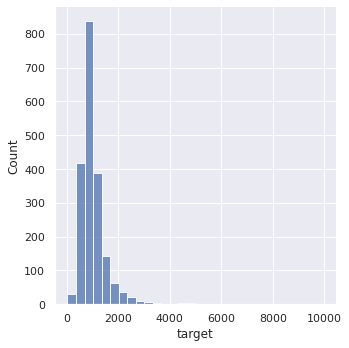

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data['target'], bins=30)
plt.show()

We see that the values of Cost per patient (target) are distributed normallly without outliers.

**Attributes Correlation**

In [ ]:
data.corr(method='pearson')

,Minority,Hispanic/Latino,200Poverty,100Poverty,Uninsured,Medicaid/CHIP,Medicare,Third-Party,Homeless,Veterans,Medical,Dental,Mental,EnablingServices,Hypertension,Diabetes,Asthma,HIV,PrenatalCare,LowBirthWeight,CervicalCancerScreening,AdultWeightScreening,TobaccoScreening,ColorectalCancerScreening,DepressionScreening,AsthmaMedications,AspirinIVD,ControllingHighBP,UncontrolledDiabetes,target
Minority,1.000000,0.598052,0.433568,0.499053,0.281032,0.316600,-0.577799,-0.538858,0.083045,-0.518434,0.082090,-0.030351,-0.039441,0.143215,-0.223763,0.159853,0.194279,0.115867,-0.284217,-0.033400,0.189568,0.062279,-0.040139,-0.082395,0.018561,0.077842,-0.040586,-0.187107,0.276612,0.060744
Hispanic/Latino,0.598052,1.000000,0.286405,0.253949,0.251613,0.204494,-0.418310,-0.419569,-0.003312,-0.366283,0.106889,-0.038181,-0.042668,0.117429,-0.335426,0.113257,0.012794,0.005716,-0.069112,-0.117964,0.272855,0.123615,0.137354,0.081387,0.071603,0.081789,0.028727,0.109589,0.111742,-0.039621
200Poverty,0.433568,0.286405,1.000000,0.741964,0.253194,0.260440,-0.380433,-0.526171,0.142372,-0.372728,-0.021125,-0.010550,0.050450,0.103177,-0.061165,0.180962,0.033612,-0.011939,-0.201611,0.024859,-0.008130,0.121611,-0.046605,-0.153171,0.042026,-0.012354,-0.048307,-0.113270,0.224745,-0.122154
100Poverty,0.499053,0.253949,0.741964,1.000000,0.233292,0.299874,-0.385925,-0.554552,0.266491,-0.401719,-0.018446,-0.101459,0.087883,0.145288,-0.061675,0.160830,0.119248,0.043046,-0.234590,0.046704,0.006569,0.157545,-0.043370,-0.154303,0.046427,-0.020488,-0.052395,-0.147394,0.264274,-0.068735
Uninsured,0.281032,0.251613,0.253194,0.233292,1.000000,-0.547789,-0.419276,-0.327932,0.109119,-0.199705,-0.065182,0.018008,-0.101674,0.178011,-0.107472,0.143369,-0.333931,0.057301,-0.287495,-0.039298,-0.043292,0.082944,-0.079592,-0.231315,0.094443,-0.000742,-0.030134,-0.163998,0.230026,-0.140627
Medicaid/CHIP,0.316600,0.204494,0.260440,0.299874,-0.547789,1.000000,-0.325170,-0.556519,0.120376,-0.276094,-0.110867,0.155183,0.155138,-0.008330,-0.186070,-0.037264,0.369215,-0.012280,-0.007493,-0.007497,0.151715,0.036377,0.084887,0.061681,-0.006223,0.073846,0.023436,0.057603,0.027541,0.093591
Medicare,-0.577799,-0.418310,-0.380433,-0.385925,-0.419276,-0.325170,1.000000,0.507910,-0.069203,0.515292,0.155935,-0.200449,0.058151,-0.095460,0.437029,0.028070,0.035088,-0.031499,0.292825,0.089252,-0.147559,-0.077789,0.007413,0.152777,-0.113506,-0.098383,0.000712,0.107662,-0.260284,0.084335
Third-Party,-0.538858,-0.419569,-0.526171,-0.554552,-0.327932,-0.556519,0.507910,1.000000,-0.291449,0.401082,0.168653,-0.145080,-0.123570,-0.179821,0.183169,-0.157471,-0.110151,-0.043136,0.244810,0.015824,-0.084804,-0.125362,-0.021082,0.141904,-0.057867,-0.054547,0.006155,0.080285,-0.213567,0.007354
Homeless,0.083045,-0.003312,0.142372,0.266491,0.109119,0.120376,-0.069203,-0.291449,1.000000,0.032710,-0.068290,-0.085381,0.285964,0.214101,-0.111409,-0.080814,0.069910,0.084216,-0.135789,0.067108,-0.121088,-0.050025,-0.036168,-0.126563,-0.079466,-0.024283,0.029328,-0.112334,0.113829,0.205339
Veterans,-0.518434,-0.366283,-0.372728,-0.401719,-0.199705,-0.276094,0.515292,0.401082,0.032710,1.000000,-0.052484,0.075386,0.049362,-0.072616,0.163583,-0.110647,-0.048509,-0.054850,0.201723,0.063821,-0.135289,-0.115852,-0.018003,0.086360,-0.049301,-0.016631,0.030777,0.081790,-0.190762,0.154495


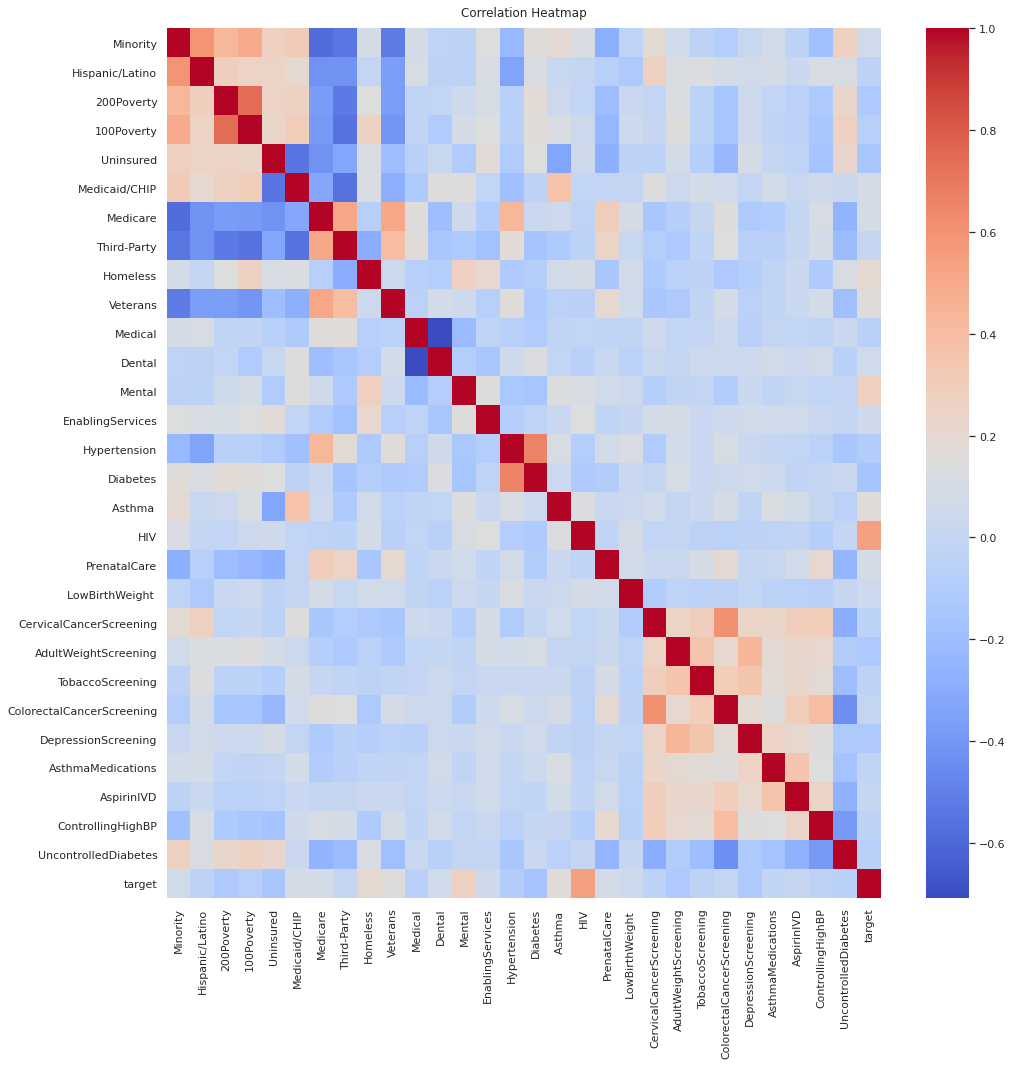

In [ ]:
# Correlation Map
plt.figure(figsize=(16, 16))
data_corr = data.corr()
# chart = sns.heatmap(data_corr, vmin=-1, vmax=1, annot=True, xticklabels=True,yticklabels=True,cmap='coolwarm');
chart = sns.heatmap(data_corr, xticklabels=True,yticklabels=True,cmap='coolwarm');
chart.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


**Note:**
From the above correlation table and plot, the rate of HIV patients (HIV) is correlated with the cost per patient (target) directly. 
Other than that, there is a positive relation between the following attributes:


*   Rate of Hispanic/Latino Patients (Hispanic/Latino) and Rate of Minority Patients (Minority)
*   Rate of Patients at or Below 200% of Federal Poverty Guideline (200Poverity) and Rate of Patients at or Below 100% of Federal Poverty Guideline (100Poverty)
*   Rate of Medicare Patients (Medicare) and Rate of Third-Party Patients (Third-Party)
*   Rate of Veteran Patients (Veterans) and Rate of Medicare Patients (Medicare)
*   Rate of Hypertensive Patients (Hypertension) and Rate of Diabetic Patients (Diabetes)
*   Rate of Colorectal Cancer Screening Patients (ColorectalCancerScreening) and Rate of Cervical Cancer Screening Patients (CervicalCancerScreening)

We can also see there is an inverse proportion between the following attributes:


*   Rate of Medicare Patients (Medicare) and Rate of Minority Patients (Minority)
*   Rate of Third-Party Patients (Third-Party) and Rate of Minority Patients (Minority)
*   Rate of Veterans Patients (Veterans) and Rate of Minority Patients (Minority)
*   Rate of Third-Party Patients (Third-Party) and Rate of Patients at or Below 200% of Federal Poverty Guideline (200Poverity)
*   Rate of Third-Party Patients (Third-Party) and Rate of Patients at or Below 100% of Federal Poverty Guideline (100Poverity)
*   Rate of Third-Party Patients (Third-Party) and Rate of Medicaid/CHIP Patients (Medicaid, Medicaid CHIP, and Other Public Insurance CHIP) (Medicaid/CHIP)
*   Rate of Patients Receiving Medical Services (Medical) and Rate of Patients Receiving Dental Services (Dental)


In [ ]:
data.corr()['target'].sort_values()

Diabetes                    -0.159840
Uninsured                   -0.140627
AdultWeightScreening        -0.123494
200Poverty                  -0.122154
DepressionScreening         -0.118779
Hypertension                -0.091756
100Poverty                  -0.068735
UncontrolledDiabetes        -0.063436
Medical                     -0.060783
CervicalCancerScreening     -0.045449
Hispanic/Latino             -0.039621
ControllingHighBP           -0.039471
TobaccoScreening            -0.036681
AsthmaMedications           -0.020419
ColorectalCancerScreening   -0.001933
AspirinIVD                   0.006954
Third-Party                  0.007354
LowBirthWeight               0.051564
EnablingServices             0.057885
Minority                     0.060744
Dental                       0.060811
PrenatalCare                 0.082690
Medicare                     0.084335
Medicaid/CHIP                0.093591
Veterans                     0.154495
Asthma                       0.170377
Homeless    

**2. Modeling**


**2.1. Prepare Data for Machine Learning**

In [ ]:
# Choose Features and Target
x = data.drop(["target"], axis=1)
y = data["target"]

In [ ]:
# Split the data 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = SEED)


Here, I will evaluate the following machine learning algorithms then select the best one based on Root Mean Square Error


*   Linear Regression
*   Lasso
*   Elastic Net
*   K Neighbors 
*   Decision Tree
*   SVR
*   Ada Boost
*   Random Forest
*   Extra Trees
*   Gradient Boosting



**2.2. Train and Evaluate Models**

Linear: -303288.76, 204943.107
Lasso: -306541.294, 219480.477
ElasticNet: -559044.482, 419177.229
KNN: -404735.126, 282139.117
DecisionTree: -484061.95, 307327.62
SVR: -593587.8, 439072.556
AdaBoost: -369179.011, 171755.158
GradientBoost: -271704.687, 185576.044
RandomForest: -274826.158, 204573.818
ExtraTrees: -234012.261, 197581.408


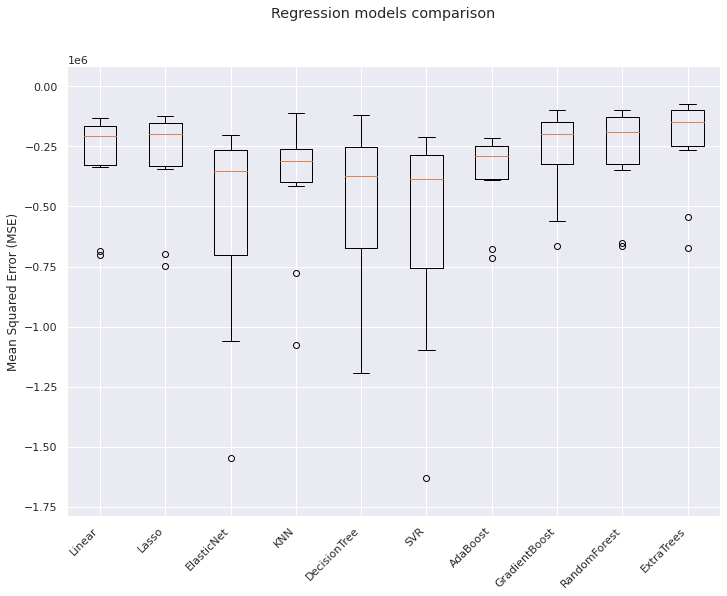

In [ ]:
# different regression models
# user variables to tune
folds = 10
metric = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()


# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
	model   = models[model_name]
	k_fold  = KFold(n_splits=folds)
	results = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=metric)
	
	model_results.append(results)
	model_names.append(model_name)
	print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1); plt.show()

**2.3. Selecting the model**
Based on the above comparison, we observe that Extra Tree model outperforms the other models. So we will choose it as the best regression model for this problem.

In [ ]:
# create and fit the best regression model
best_model = ExtraTreesRegressor(random_state=SEED)
best_model.fit(x_train, y_train)

# make predictions using the model
predictions = best_model.predict(x_test)
print("RMSE : {}".format((MSE(y_test, predictions)**(1/2))))


RMSE : 409.0466290992062


**2.4. The important features**

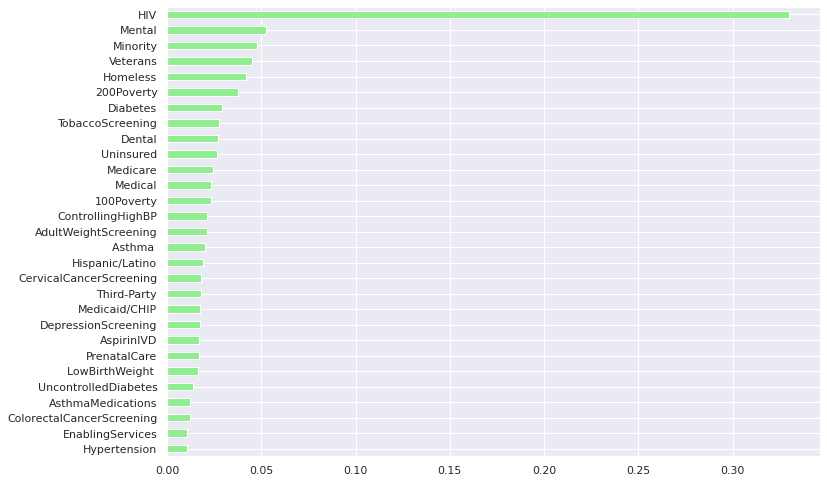

Hypertension                 0.010665
EnablingServices             0.010682
ColorectalCancerScreening    0.012087
AsthmaMedications            0.012211
UncontrolledDiabetes         0.013593
LowBirthWeight               0.016258
PrenatalCare                 0.016877
AspirinIVD                   0.017014
DepressionScreening          0.017660
Medicaid/CHIP                0.017719
Third-Party                  0.018040
CervicalCancerScreening      0.018243
Hispanic/Latino              0.019179
Asthma                       0.020025
AdultWeightScreening         0.021268
ControllingHighBP            0.021488
100Poverty                   0.023105
Medical                      0.023248
Medicare                     0.024564
Uninsured                    0.026425
Dental                       0.027171
TobaccoScreening             0.027799
Diabetes                     0.029303
200Poverty                   0.037832
Homeless                     0.042151
Veterans                     0.045331
Minority    

In [ ]:
# Feature importance 

# Create a pd.Serise of features importances
importances_rf = pd.Series(best_model.feature_importances_, index=x.columns) #data=rf.feature_importances_, index=X_train.columns

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

# print sorted importances_rf
print(sorted_importances_rf)

We observe that the most important features  include HIV(32.97%), Mental (5.24%), Minority (4.79%), Veterans (4.53%), Homeless (4.22%), and 200Poverty (3.78%)

We will try and discard features with importance coefficient less than 0.01 and use it to model our Extra Trees again to see if there is an improvement in our prediction results.

In [ ]:
# Redo with correlated features > 0.01: HIV, Mental, Veterans, 200Poverty, CervicalCancerScreening
x1 = data[['HIV', 'Mental', 'Minority', 'Veterans','Homeless', '200Poverty']]
y1 = data["target"]

# Split the data (2nd round)
x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = SEED)

# create and fit the best regression model
best_model1 = ExtraTreesRegressor(random_state=SEED)
best_model1.fit(x1_train, y1_train)

# make predictions using the model
predictions1 = best_model1.predict(x1_test)
print("RMSE : {}".format((MSE(y1_test, predictions1)**(1/2))))

RMSE : 437.4681168949196


Notice that the RMSE did not improve after removing lowly correlated features.

We  will check again the feature importance values of these new subdataset.

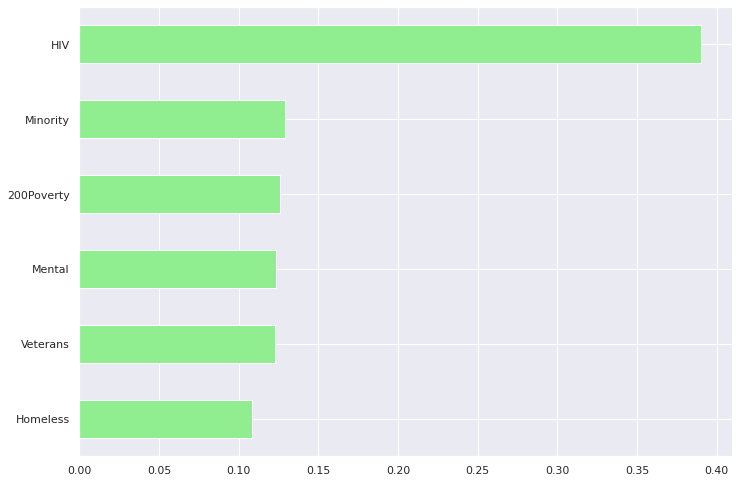

Homeless      0.108438
Veterans      0.123014
Mental        0.123511
200Poverty    0.126019
Minority      0.128730
HIV           0.390288
dtype: float64


In [ ]:
# Redo Feature Importance with highly correlated features
importances_rf1 = pd.Series(best_model1.feature_importances_, index=x1.columns) #data=rf.feature_importances_, index=X_train.columns

# Sort importances_rf
sorted_importances_rf1 = importances_rf1.sort_values()

# Make a horizontal bar plot
sorted_importances_rf1.plot(kind='barh', color='lightgreen'); plt.show()

# print sorted importances_rf
print(sorted_importances_rf1)

The importance values significantly increased from before.

We can visualize the predictions made by our best model and the original targets below.

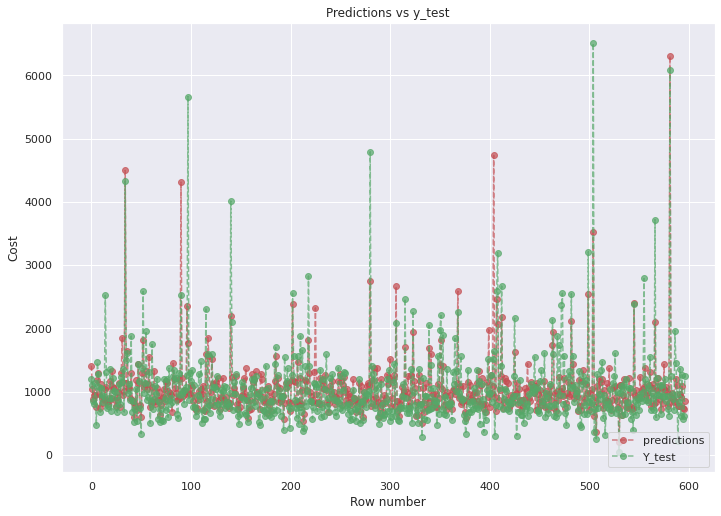

In [ ]:
# plot between predictions and Y_test
x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, predictions, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('Cost')
plt.title('Predictions vs y_test')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# save the model to disk
import pickle
filename = 'model.pkl'
pickle.dump(best_model, open(filename, 'wb'))


**3. Summary**

As a summary, in this research, I used HRSA health center dataset to build a prediction model. I started with data exploration, then data preperation. After that, I tested 10 models for cost prediction. Finally, I selected the best model and save it to embed to a webpage for interaction.